# Review of pandas DataFrames

## pandas Common Commands

* type(df)
* df.shape
* df.columns
* df.iloc[:5,:]
    * Slicing above ends with same results as df.head()
        * Slice starting from start of df, to the 5th row, and include all columns
* df.info()

In [1]:
import pandas as pd
from pandas_datareader import data as wb
# Get Apple stock data from YahooFinance
AAPL = wb.DataReader('AAPL', data_source='yahoo', start='2010-1-1')
type(AAPL)

pandas.core.frame.DataFrame

In [2]:
AAPL.shape

(2454, 6)

In [3]:
AAPL.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [4]:
# Slicing data starting from start of dataframe until the 5th row
#  index count starts from 0, selects rows 0,1,2,3,4 (row 5 is not selected)
AAPL.iloc[:5, :]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249


In [5]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-26,220.940002,218.830002,220.000000,219.889999,18833500.0,219.889999
2019-09-27,220.960007,217.279999,220.539993,218.820007,25352000.0,218.820007
2019-09-30,224.580002,220.789993,220.899994,223.970001,25977400.0,223.970001
2019-10-01,228.220001,224.199997,225.070007,224.589996,34805800.0,224.589996
2019-10-02,223.580002,217.929993,223.059998,219.039902,30427114.0,219.039902


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2454 entries, 2010-01-04 to 2019-10-02
Data columns (total 6 columns):
High         2454 non-null float64
Low          2454 non-null float64
Open         2454 non-null float64
Close        2454 non-null float64
Volume       2454 non-null float64
Adj Close    2454 non-null float64
dtypes: float64(6)
memory usage: 134.2 KB


## Series

* The columns of a *DataFrame* are themselves a specialized **pandas** structure called a **Series**
* Extracting a single column from a *DataFrame* returns a **Series**
    * Note: The **Series** extracted has its own head method and inherits the name attribute from the *DataFrame* column
* To extract the numerical entries from the **Series**, use the values attribute
    * Data in the **Series** actually form a *NumPy* array which is what the values attribute yields  
* **Series** - 1D labeled *NumPy* array
* **DataFrame** - 2D labeled array whose columns are **Series**

In [7]:
low = AAPL['Low']
type(low)

pandas.core.series.Series

## Plotting with pandas

### Plotting arrays (matplotlib)

In [8]:
import matplotlib.pyplot as plt
# Note: AAPL['Close'] returns a Series and .values returns a NumPy array
close_array = AAPL['Close'].values
type(close_array)

numpy.ndarray

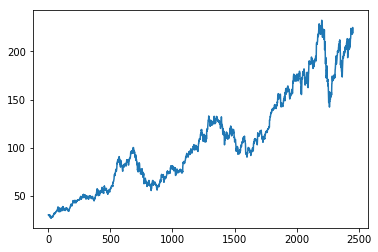

In [9]:
# .plot() can plot NumPy arrays or Lists
plt.plot(close_array)

### Plotting Series (matplotlib)

In [10]:
close_series = AAPL['Close']
type(close_series)

pandas.core.series.Series

C:\Users\cgrindean\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


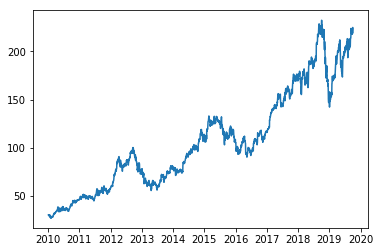

In [11]:
plt.plot(close_series)

### Plotting Series (pandas)

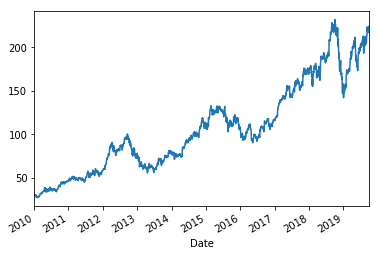

In [12]:
# Plots Series directly
close_series.plot()

### Plotting DataFrames (matplotlib)

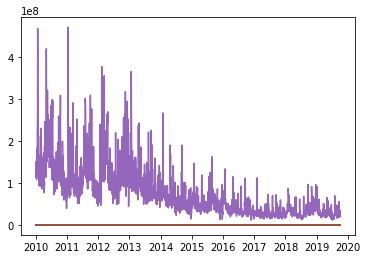

In [13]:
# Plots all Columns at once
# matplotlib.pyplot.plot(df)
plt.plot(AAPL)

### Plotting DataFrames (pandas)

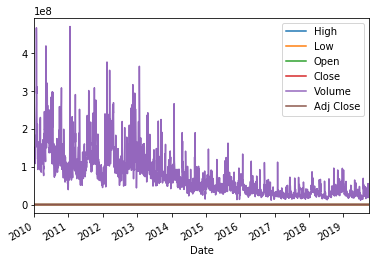

In [14]:
# Plots all Series at once
# df.plot()
AAPL.plot()

#### Fixing Scales

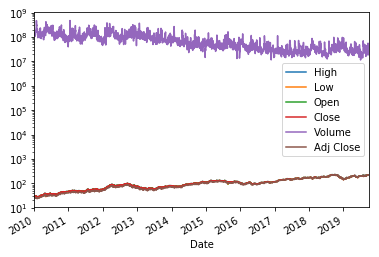

In [15]:
# Logarithmic scale on vartical axis
AAPL.plot()
plt.yscale('log')

#### Customizing Plots

('2010', '2012', 0, 100)

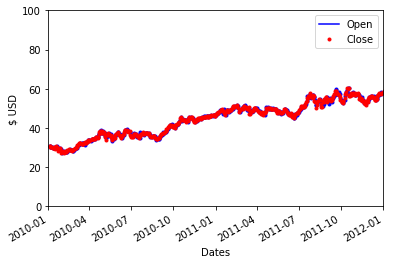

In [16]:
AAPL['Open'].plot(color='b', style='.-', legend=True)
AAPL['Close'].plot(color='r', style='.', legend=True)
plt.xlabel('Dates')
plt.ylabel('$ USD')
plt.axis(('2010','2012',0 ,100))

#### Saving Plots
```python
plt.savefig('AAPL.png')
plt.savefig('AAPL.jpg')
plt.savefig('AAPL.pdf')
```